In [55]:
datos=spark.read.csv("cruise_ship_info.csv",
                    header=True,inferSchema=True)

In [56]:
datos.printSchema(),datos.show(2)

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)

+---------+-----------+---+------------------+----------+------+------+-----------------+----+
|Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+---------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|    Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
+---------+-----------+---+------------------+----------+------+------+-----------------+----+
only showing top 2 rows



(None, None)

In [57]:
from pandas.plotting import scatter_matrix

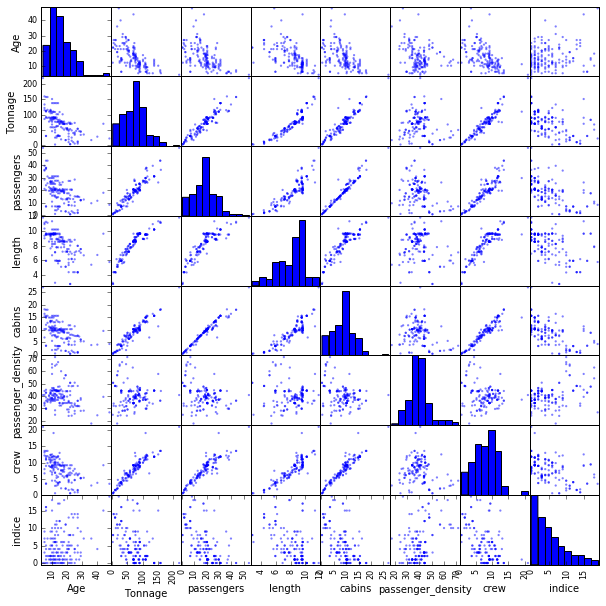

In [112]:
a=scatter_matrix(datosI.toPandas(),figsize=(10,10))

In [59]:
from pyspark.ml.feature import VectorAssembler

In [60]:
datos.columns

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

In [61]:
constructor=VectorAssembler(inputCols=['Age',
 'Tonnage', 'passengers', 'length', 'cabins',
 'passenger_density'],outputCol="features")

In [62]:
datosF=constructor.transform(datos)

In [63]:
datosF.head(1)

[Row(Ship_name='Journey', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55, features=DenseVector([6.0, 30.277, 6.94, 5.94, 3.55, 42.64]))]

In [64]:
datosF.count()

158

In [65]:
entrena,evalua=datosF.randomSplit([0.8,0.2])

In [66]:
entrena.count(),evalua.count()

(122, 36)

In [67]:
datosF.describe().show(vertical=True)

-RECORD 0-------------------------------
 summary           | count              
 Ship_name         | 158                
 Cruise_line       | 158                
 Age               | 158                
 Tonnage           | 158                
 passengers        | 158                
 length            | 158                
 cabins            | 158                
 passenger_density | 158                
 crew              | 158                
-RECORD 1-------------------------------
 summary           | mean               
 Ship_name         | Infinity           
 Cruise_line       | null               
 Age               | 15.689873417721518 
 Tonnage           | 71.28467088607599  
 passengers        | 18.45740506329114  
 length            | 8.130632911392404  
 cabins            | 8.830000000000005  
 passenger_density | 39.90094936708861  
 crew              | 7.794177215189873  
-RECORD 2-------------------------------
 summary           | stddev             
 Ship_name      

In [68]:
from pyspark.ml.regression import LinearRegression

In [69]:
lr=LinearRegression(labelCol="crew")

In [70]:
modelo=lr.fit(entrena)

In [71]:
evaluacion=modelo.evaluate(evalua)

In [86]:
evaluacion.r2,100*evaluacion.rootMeanSquaredError

(0.9366011596949546, 89.75729943317458)

In [84]:
errores=evaluacion.residuals
errores.withColumn("residuals",
        errores.residuals*100).orderBy("residuals",
        ascending=False)\
 .show()

+------------------+
|         residuals|
+------------------+
| 275.3589547093927|
|192.05932615953688|
|114.90346789441136|
|114.90346789441136|
| 107.3013655559622|
|105.94862346221544|
| 72.73274456061625|
| 70.91044272157774|
| 70.03333486361586|
| 61.08740470636145|
|39.977733316098885|
|29.576977620838818|
| 26.93164874894336|
|26.664967946689977|
|26.402964214077862|
|24.166009245851683|
| 21.12219214157376|
| 4.213261369210041|
| 3.945965489064207|
| 3.770226134498167|
+------------------+
only showing top 20 rows



StringIndexer

In [90]:
datos.groupBy("Cruise_line").count()\
    .orderBy("count",ascending=False).show()

+-----------------+-----+
|      Cruise_line|count|
+-----------------+-----+
|  Royal_Caribbean|   23|
|         Carnival|   22|
|         Princess|   17|
| Holland_American|   14|
|        Norwegian|   13|
|            Costa|   11|
|        Celebrity|   10|
|              MSC|    8|
|             Star|    6|
|              P&O|    6|
|Regent_Seven_Seas|    5|
|        Silversea|    4|
|         Seabourn|    3|
|           Cunard|    3|
|         Windstar|    3|
|          Oceania|    3|
|          Crystal|    2|
|           Disney|    2|
|          Azamara|    2|
|           Orient|    1|
+-----------------+-----+



In [91]:
from pyspark.ml.feature import StringIndexer

In [92]:
indexador=StringIndexer(inputCol="Cruise_line",
                       outputCol="indice")

In [93]:
datosI=indexador.fit(datos).transform(datos)

In [96]:
datosI.select("Cruise_line","indice").distinct().show()

+-----------------+------+
|      Cruise_line|indice|
+-----------------+------+
|            Costa|   5.0|
|        Norwegian|   4.0|
|              MSC|   7.0|
|             Star|   8.0|
|           Orient|  19.0|
|           Disney|  17.0|
|Regent_Seven_Seas|  10.0|
|  Royal_Caribbean|   0.0|
|              P&O|   9.0|
|         Windstar|  14.0|
|         Princess|   2.0|
|         Seabourn|  13.0|
|          Azamara|  16.0|
| Holland_American|   3.0|
|          Oceania|  12.0|
|        Celebrity|   6.0|
|          Crystal|  18.0|
|        Silversea|  11.0|
|           Cunard|  15.0|
|         Carnival|   1.0|
+-----------------+------+



In [98]:
datosI.show(vertical=True)

-RECORD 0-------------------------------
 Ship_name         | Journey            
 Cruise_line       | Azamara            
 Age               | 6                  
 Tonnage           | 30.276999999999997 
 passengers        | 6.94               
 length            | 5.94               
 cabins            | 3.55               
 passenger_density | 42.64              
 crew              | 3.55               
 indice            | 16.0               
-RECORD 1-------------------------------
 Ship_name         | Quest              
 Cruise_line       | Azamara            
 Age               | 6                  
 Tonnage           | 30.276999999999997 
 passengers        | 6.94               
 length            | 5.94               
 cabins            | 3.55               
 passenger_density | 42.64              
 crew              | 3.55               
 indice            | 16.0               
-RECORD 2-------------------------------
 Ship_name         | Celebration        
 Cruise_line    

In [100]:
print(datosI.columns)

['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew', 'indice']


In [102]:
constructor2=VectorAssembler(inputCols=['Age', 
 'Tonnage','passengers','length', 'cabins', 
 'passenger_density','indice'],outputCol="features")

In [103]:
datosIF=constructor2.transform(datosI)

In [105]:
entrena2,evalua2=datosIF.randomSplit([0.8,0.2])

In [106]:
modelo2=lr.fit(entrena2)

In [107]:
evaluacion2=modelo2.evaluate(evalua2)

In [108]:
evaluacion2.r2

0.9438295200385272

In [109]:
datosIF.corr("indice","crew")

-0.48332562728617057

In [110]:
datosIF.corr("Tonnage","crew")

0.9275688115449388

In [111]:
datosIF.corr("Age","crew")

-0.5306565039638852

In [114]:
datosIF.corr("passenger_density","crew")

-0.15550928421699717